In [3]:
import yfinance as yf

In [85]:
data = yf.download("CL=F", period="60d", interval = "60m")
print(data)

[*********************100%***********************]  1 of 1 completed
                                Open       High        Low      Close  \
Datetime                                                                
2021-02-10 00:00:00-05:00  58.270000  58.349998  58.169998  58.320000   
2021-02-10 01:00:00-05:00  58.320000  58.360001  58.150002  58.169998   
2021-02-10 02:00:00-05:00  58.169998  58.320000  58.099998  58.279999   
2021-02-10 03:00:00-05:00  58.290001  58.369999  58.180000  58.360001   
2021-02-10 04:00:00-05:00  58.349998  58.689999  58.320000  58.529999   
...                              ...        ...        ...        ...   
2021-04-22 10:00:00-04:00  61.400002  61.580002  60.810001  61.540001   
2021-04-22 11:00:00-04:00  61.529999  61.720001  61.349998  61.480000   
2021-04-22 12:00:00-04:00  61.480000  61.610001  61.380001  61.520000   
2021-04-22 13:00:00-04:00  61.509998  61.540001  61.270000  61.320000   
2021-04-22 13:11:32-04:00  61.310001  61.310001  61.310

In [88]:
import pandas as pd
date1 = '2018-04-10'
date2 = '2021-04-20'
mydates = pd.date_range(date1, date2).tolist()

print(len(mydates))
print(len(mydates))

1107
1107


In [89]:
date_times = data.index
data.index = mydates

In [83]:
print(data.index)

DatetimeIndex(['1986-08-03', '1986-08-04', '1986-08-05', '1986-08-06',
               '1986-08-07', '1986-08-08', '1986-08-09', '1986-08-10',
               '1986-08-11', '1986-08-12',
               ...
               '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16', '2021-04-17', '2021-04-18',
               '2021-04-19', '2021-04-20'],
              dtype='datetime64[ns]', length=12680, freq=None)


In [90]:

g= open("1h_dates.txt","w")

data.to_csv("1h_data.csv")

for i in range(0,len(date_times)):
    g.write(str(date_times[i]) +",")
    
g.close()

In [5]:
results = []
with open("ex.txt", "r") as a_file:
  for line in a_file:
    line = line.replace("[","")
    line = line.replace("]"," ")
    temp = list(line.split())
    for i in temp:
        results.append(i)

for i in range(0,len(results)):
    results[i] = float(results[i])

print(results)

print(len(results))

ValueError: could not convert string to float: '...'

In [2]:
import pandas as pd
df = yf.download('CL=F', period = 'max', progress=False)
df = df.rename_axis('Date').reset_index()
df = df.drop('Adj Close', 1)
df= pd.DataFrame(pd.np.repeat(df.values,5,axis=0),columns=df.columns)
# Replace 0 to avoid dividing by 0 later on
df['Volume'].replace(to_replace=0, method='ffill', inplace=True) 
df.sort_values('Date', inplace=True)

# Apply moving average with a window of 10 days to all columns
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].rolling(3).mean() 

# Drop all rows with NaN values
df.dropna(how='any', axis=0, inplace=True) 
df.tail()


###############################################################################
'''Create training, validation and test split'''

times = sorted(df.index.values)
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series

df_train = df[(df.index < last_20pct)]  # Training data are 80% of total data
df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
df_test = df[(df.index >= last_10pct)]

# Remove date column
df_train.drop(columns=['Date'], inplace=True)
df_val.drop(columns=['Date'], inplace=True)
df_test.drop(columns=['Date'], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

df_train.head()



min_return = min(df[['Open', 'High', 'Low', 'Close']].min(axis=0))
max_return = max(df[['Open', 'High', 'Low', 'Close']].max(axis=0))

df['Close'][-len(results):] = results

df['Close'] = (df['Close'] * (max_return - min_return)) + min_return 
    
results = df['Close'][-len(results):]

NameError: name 'yf' is not defined

In [44]:
print(len(results)/5 *2)

7036.4


[*********************100%***********************]  1 of 1 completed
2000-08-23 00:00:00
2021-04-22 00:00:00


ValueError: x and y must have same first dimension, but have shapes (5156,) and (17591,)

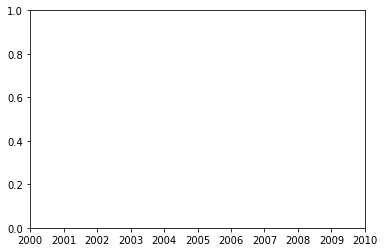

In [40]:
import yfinance as yf
data = yf.download("CL=F", period="max")
print(min(data.index))
print(max(data.index))
dates = data.index[-17591:]
real = data["Close"][-17591:]

import matplotlib.pyplot as plt
plt.plot(dates,results, label = "LSTM Prediction")
plt.gcf().set_size_inches(20, 10)
plt.ylabel("Price", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.title("Comparison of LSTM predictions to true prices", fontsize=18)
plt.legend(fontsize=18)
plt.show()